# Reducción de dimensionalidad


-----


---
El siguiente _jupyter notebook_ tiene como fin ser una breve guía de creación de gráficos con interacciones utilizando la librería Altair y de utilización de reducción de dimensionalidad para algunos problemas interesantes.

Este _jupyter notebook_ se compone de 5 actividades de diferente dificultad (algunas serán preguntas en texto, otras deberán programar y comentar sobre el resultado), las cuales se dividen en 2 partes:

- Reducción de dimensionalidad con datos tabulares (2 actividades)
- Reducción de dimensionalidad con imágenes (3 actividades)

Autor: Jorge Romero

## Instalar e importar librerías del práctico

In [ ]:
!pip install umap-learn -q

In [ ]:
import altair as alt
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn import datasets
from sklearn.manifold import TSNE, MDS
import umap
import requests
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd

## Descargar _dataset_

En primer lugar, como estaremos ocupando un servidor externo, es necesario descargar el _dataset_ en dicho servidor. Para esto ocuparemos una función encargada de bajar un archivo desde Google Drive.

In [ ]:
def download_file_without_authenticate(id, destination):
    def get_confirm_token(response):
        for key, value in response.cookies.items():
            if key.startswith("download_warning"):
                return value

    URL = "https://docs.google.com/uc?export=download"
    response = requests.get(URL, params={"id": id, "confirm": 1}, stream=True)

    CHUNK_SIZE = 32768
    with open(destination, "wb") as f:
        for i, chunk in enumerate(response.iter_content(CHUNK_SIZE)):
            if chunk:  # filter out keep-alive new chunks
                f.write(chunk)

    return None

download_file_without_authenticate("14NAdrE1FrgZMYxabOyhk9kgybdUhl2Wv", "penguins.csv")

# Reducción de dimensionalidad

Reducción de dimensionalidad es transformar los datos a una nueva representación con menos dimensiones. Por ejemplo, empezar con 10 columnas y luego calcular 2 columnas adicionales que representan más o menos la misma información que las 10 columnas iniciales.

Existen muchos tipos de formas de reducir la dimensionalidad. En esta actividad utilizaremos 4: PCA, TSNE, MDS y UMAP.

A continuación se despliegan las funciones encargadadas de tomar un _dataset_ y aplicarle uno de los 4 algoritmos de reducción de dimensionalidad para reducir el _dataset_ a 2 dimensiones/columnas. Estas funciones se ocuparán en diferentes actividades.

In [ ]:
def reducir_con_pca(data):
    """
    Principal Components Analysis (pca)
    Explicación del método en español: https://es.wikipedia.org/wiki/An%C3%A1lisis_de_componentes_principales
    """
    dim_red = PCA(n_components=2).fit(data)
    data_new_dimensions = dim_red.transform(data)
    return pd.DataFrame(data_new_dimensions, columns=["X", "Y"])


def reducir_con_tsne(data, perplexity, n_iter):
    """
    Expicación del método en inglés: https://en.wikipedia.org/wiki/T-distributed_stochastic_neighbor_embedding
    Este método tiene una componente aleatoria, por lo que no siempre entrega la misma distribución para un mismo set de puntos.
    """
    data_new_dimensions = TSNE(n_components=2, perplexity=perplexity,
                               n_iter=n_iter, init="random").fit_transform(data)
    return pd.DataFrame(data_new_dimensions, columns=["X", "Y"])


def reducir_con_mds(data, max_iter):
    """
    Esta es otra técnica que es posible utilizar, pero no fue vista en clases.
    Multidimensional Scalling (mds)
    Explicación del método en español: https://es.wikipedia.org/wiki/Escalamiento_multidimensional
    Este método tiene una componente aleatoria, por lo que no siempre entrega la misma distribución para un mismo set de puntos.
    """
    data_new_dimensions = MDS(n_components=2, max_iter=max_iter,
                              normalized_stress="auto").fit_transform(data)
    return pd.DataFrame(data_new_dimensions, columns=["X", "Y"])


def reducir_con_umap(data, n_neighbors):
    """
    Uniform manifold approximation and projection
    Explicación del método en ingles: https://en.wikipedia.org/wiki/Nonlinear_dimensionality_reduction
    Este método tiene una componente aleatoria, por lo que no siempre entrega la misma distribución para un mismo set de puntos.
    """
    data_new_dimensions = umap.UMAP(n_neighbors=n_neighbors).fit_transform(data)
    return pd.DataFrame(data_new_dimensions, columns=["X", "Y"])

### Documentación de funciones

* `reducir_con_pca(data)`: recibe el *dataset* y retorna un DataFrame con 2 columnas obtenidas tras aplicar PCA.

* `reducir_con_tsne(data, perplexity, n_iter)`: recibe el *dataset* y dos números positivos. Retorna un DataFrame con 2 columnas obtenidas tras aplicar TSNE. Cambiar el parámetro `perplexity` y/o `n_iter` permite obtener diferentes resultados.

* `reducir_con_mds(data, max_iter)`: recibe el *dataset* y un número positivo. Retorna un DataFrame con 2 columnas obtenidas tras aplicar MDS. Cambiar el parámetro `max_iter` permite obtener diferentes resultados.

* `reducir_con_umap(data, n_neighbors)`: recibe el *dataset* y un número positivo. Retorna un DataFrame con 2 columnas obtenidas tras aplicar UMAP. Cambiar el parámetro `n_neighbors` permite obtener diferentes resultados.

Ejemplo de uso de las funciones:

```python
pca_dataset = reducir_con_pca(dataset)
tsne_dataset = reducir_con_tsne(dataset, 60, 300)
```

Ahora cargamos los datos que usaremos. En esta ocasión, corresponde a información de 3 especies de pingüinos.

In [ ]:
penguins = pd.read_csv("penguins.csv")
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


Podemos notar que tenemos datos `NaN` y datos categóricos. En esta ocasión vamos a transformar las categorías a número y eliminar los `NaN`.

In [ ]:
# Eliminar nan
data = penguins.dropna().copy()

# Transformar categorías a números
data.island = preprocessing.LabelEncoder().fit_transform(data.island)
data.sex = preprocessing.LabelEncoder().fit_transform(data.sex)

print(data.shape)
data.head()

(333, 8)


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,2,39.1,18.7,181.0,3750.0,1,2007
1,Adelie,2,39.5,17.4,186.0,3800.0,0,2007
2,Adelie,2,40.3,18.0,195.0,3250.0,0,2007
4,Adelie,2,36.7,19.3,193.0,3450.0,0,2007
5,Adelie,2,39.3,20.6,190.0,3650.0,1,2007


Ahora vamos a empezar con la reducción de dimensionalidad. Primero tenemos que indicar cuáles columnas vamos a utilizar y luego llamar a las funciones que creamos anteriormente. Se invita a ver qué sucede si se quita alguna columna.

In [ ]:
# Vamos a indicar qué columnas utilizar para la reducción de dimensionalidad.
columnas = ["island", "bill_length_mm", "bill_depth_mm",
            "flipper_length_mm", "body_mass_g", "sex"]

# Generamos un dataframe con solo las columnas de interes.
data_to_reduce = data[columnas]

# Normalizamos.
data_to_reduce = (data_to_reduce - data_to_reduce.min()) / (data_to_reduce.max() - data_to_reduce.min())

# Aplicamos reducción de dimensionalidad al dataset.
# Aquí cada variable será un DataFrame con 2 columnas que corresponde a
# la reducción de dimensionalidad pero con diferentes técnicas.
pca_data = reducir_con_pca(data_to_reduce)
tsne_data = reducir_con_tsne(data_to_reduce, perplexity=3, n_iter=500)
mds_data = reducir_con_mds(data_to_reduce, max_iter=170)
umap_data = reducir_con_umap(data_to_reduce, n_neighbors=8)

Luego nos encargamos de crear un *scatterplot* por cada reducción aplicada. Adicionalmente, pintaremos cada punto en función de la especie del pingüino.

In [ ]:
# Esta función creará los gráficos que vamos a usar.
def make_chart(dataset, metodo):
    """
    :param dataset: dataframe con los datos
    :param metodo: string con el método de reducción utilizado
    :return un Chart de Altair
    """
    source = pd.DataFrame(dataset.copy())
    source['species'] = data['species'].values

    chart = alt.Chart(source).mark_circle().encode(
        x=alt.X('X', axis=alt.Axis(title=f'{metodo}-X')),
        y=alt.Y('Y', axis=alt.Axis(title=f'{metodo}-Y')),
        color=alt.Color('species:N'),
    ).properties(width=400, height=200)
    return chart

# Se crean los gráficos para cada uno de
# los DataFrame obtenidos en las distintas reducciones.
pca_chart = make_chart(pca_data, "PCA")
tsne_chart = make_chart(tsne_data, "TSNE")
mds_chart = make_chart(mds_data, "MDS")
umap_chart = make_chart(umap_data, "UMAP")


# Los organizamos y mostramos.
((pca_chart & umap_chart)|( mds_chart & tsne_chart))

alt.HConcatChart(...)

## Actividad 1

Comente qué observa en esta reducción de dimensionalidad. En particular:
- ¿Hay algún método que separe bien las 3 clases (especie de pingüino)?
- ¿Hay alguna clase (especie de pingüino) que esté más separada al resto?
- Para los datos que están superpuestos en el gráfico de dispersión, ¿por qué sucede esto?

**Respuesta:**

1. Se observa que que a través del UMAP-X se ha conseguido una relativa mayor separacion de las especies de los pinguinos en base al color. Aunque tiende a existir un overlap en los valores entre 13 y 15. Con TSNE-X vemos que tambien existe una correcta clusterizacion de las especies de los pinguinos, solo que ahora no estan tan separados.

2. Gracias a UMAP-X y TSENE-X, podemos deducir que la especie Adelie esta relativamente separada de las demas especies.

3. Esto sucede ya que los algoritmos no son 100% efectivos y no captan todas las relaciones entre las variables al tener distintas limitaciones/caracteristicas en su formulacion.  

## Actividad 2

A continuación se presentará un _dataset_ con información de flores y diversas funciones para aplicar los métodos de reducción de dimensionalidad.
1. Debe probar cada método de reducción de dimensionalidad y visualizar el _dataset_ reducido al igual que el gráfico anterior.
2. Finalmente, debe responder unas preguntas en relación a esta actividad.

Ahora vamos a cargar los datos.

In [ ]:
iris = datasets.load_iris()
dataset = iris.data
classes = [iris.target_names[x] for x in iris.target]

df = pd.DataFrame(dataset, columns=iris.feature_names)
df["classes"] = classes
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),classes
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


Completar el siguiente código y luego responder la pregunta.

In [ ]:
# Vamos a indicar qué columnas utilizar para la reducción de dimensionalidad.
columnas = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']

# Generamos un dataframe con solo las columnas de interes.
data_to_reduce = df[columnas]

# Normalizamos.
data_to_reduce = (data_to_reduce - data_to_reduce.min()) / (data_to_reduce.max() - data_to_reduce.min())

# Aplicamos reducción de dimensionalidad al dataset.
# Aquí cada variable será un DataFrame con 2 columnas que corresponde a
# la reducción de dimensionalidad pero con diferentes técnicas.
pca_data = reducir_con_pca(data_to_reduce)
tsne_data = reducir_con_tsne(data_to_reduce, perplexity=3, n_iter=500)
mds_data = reducir_con_mds(data_to_reduce, max_iter=170)
umap_data = reducir_con_umap(data_to_reduce, n_neighbors=8)

In [ ]:
# Esta función creará los gráficos que vamos a usar. NO TOCAR.
def make_chart(dataset, metodo):
    """
    :param data: dataframe con los datos
    :return un Chart de Altair
    """

    source = pd.DataFrame(dataset.copy())
    source['classes'] = classes

    chart = alt.Chart(source).mark_circle().encode(
        x=alt.X('X', axis=alt.Axis(title=f'{metodo}-X')),
        y=alt.Y('Y', axis=alt.Axis(title=f'{metodo}-Y')),
        color=alt.Color('classes:N'),
    ).properties(width=200, height=200)
    return chart

pca_chart = make_chart(pca_data, "PCA")
tsne_chart = make_chart(tsne_data, "TSNE")
mds_chart = make_chart(mds_data, "MDS")
umap_chart = make_chart(umap_data, "UMAP")


((pca_chart & umap_chart)|( mds_chart & tsne_chart))

alt.HConcatChart(...)

Dadas las 4 técnicas:
1. ¿Cuál reduce mejor la información para separar cada clase? Justifique.

2. Por otro lado, asuma que llega un nuevo dato de una flor, pero no se sabe su clase (Setosa, Versicolour o Virginica). Explique cómo se puede reconocer a qué clase corresponde gracias a la reducción de dimensionalidad. En otras palabras, asumiendo que le llega un dato nuevo del que desconoce su clase, ¿cómo es posible determinar su clase (tipo de planta) solo usando (1) los gráficos obtenidos de reducción de dimensionalidad y (2) las funciones para reducir la dimensión?

**Respuesta:** **COMPLETAR**

1. En todos los casos vemos que existe un overlap de los data points, pero la metodologia que nos permite indentificar reliativamente valores atipicos es la de UMAP-X ya que la clase setosa se la percibe notoriamente diferente a las otras dos. Podriamos decir que TSNE-X tambien realiza un buen trabajo en separar las clases de iris, y a la vez no existe un alto overlap.

2. En base a la clusterizacion. las dos metodologias anteriormente mencionadas (UMAP-X, TSNE-X) permiten una mejor clasificacion de las flores en base a su clase. Por lo que graficamente podriamos observar a que grupo(clase) el nuevo data point esta mas cerca.
Al aplicar la funcion de reduccion de dimensionalidad, podemos ver si el nuevo dato representa una substancial variacion con respecto a los datos existentes.

# Reducción de dimensión en imágenes

A continuación vamos a tomar diferentes imágenes de letras escritas a mano ([MNIST database](https://en.wikipedia.org/wiki/MNIST_database)). Estas son imágenes de 8 x 8 píxeles, por lo tanto, podemos decir que para cada imagen hay información de 64 píxeles, en otras palabras, se puede interpretrar como 64 columnas/_features_ por ítem.

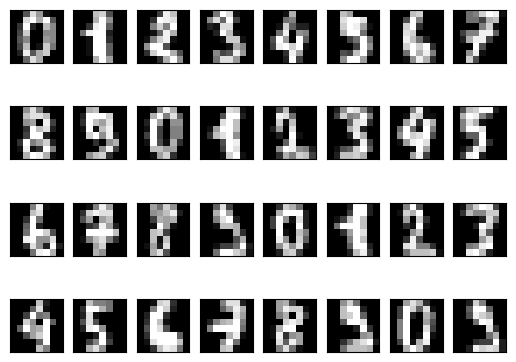

In [ ]:
# Cargar dataset
dataset = datasets.load_digits()
data_digits = np.array([x.flatten() for x in dataset.images])

# Visualizar algunas imágenes
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(dataset.images[i], cmap='gray')

Ahora vamos a generar un gráfico de dispersión con PCA y, a cada punto, le asignaremos un color según el dígito que corresponda.

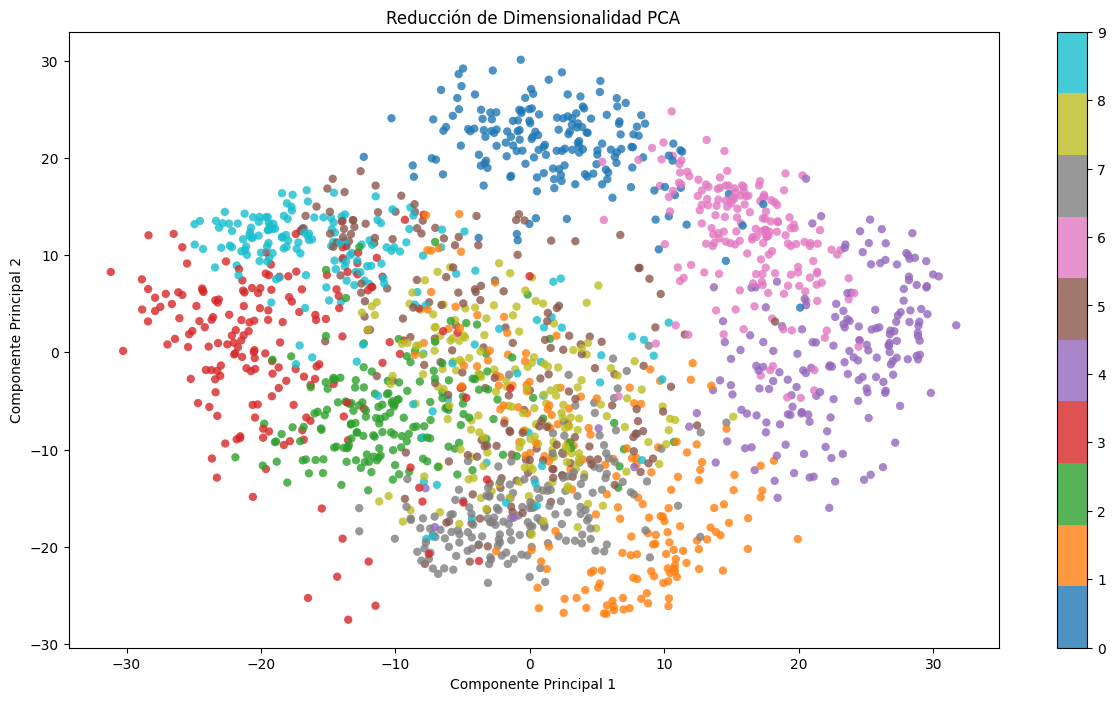

In [ ]:
# Código PCA
pca = PCA(2)
projected = pca.fit_transform(data_digits)

plt.figure(figsize=(15, 8))
plt.scatter(projected[:, 0], projected[:, 1], c=dataset.target, edgecolor='none', alpha=0.8,
            cmap=matplotlib.colormaps['tab10'] )

plt.title('Reducción de Dimensionalidad PCA')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar()
plt.show()

Ahora aplicaremos TSNE.

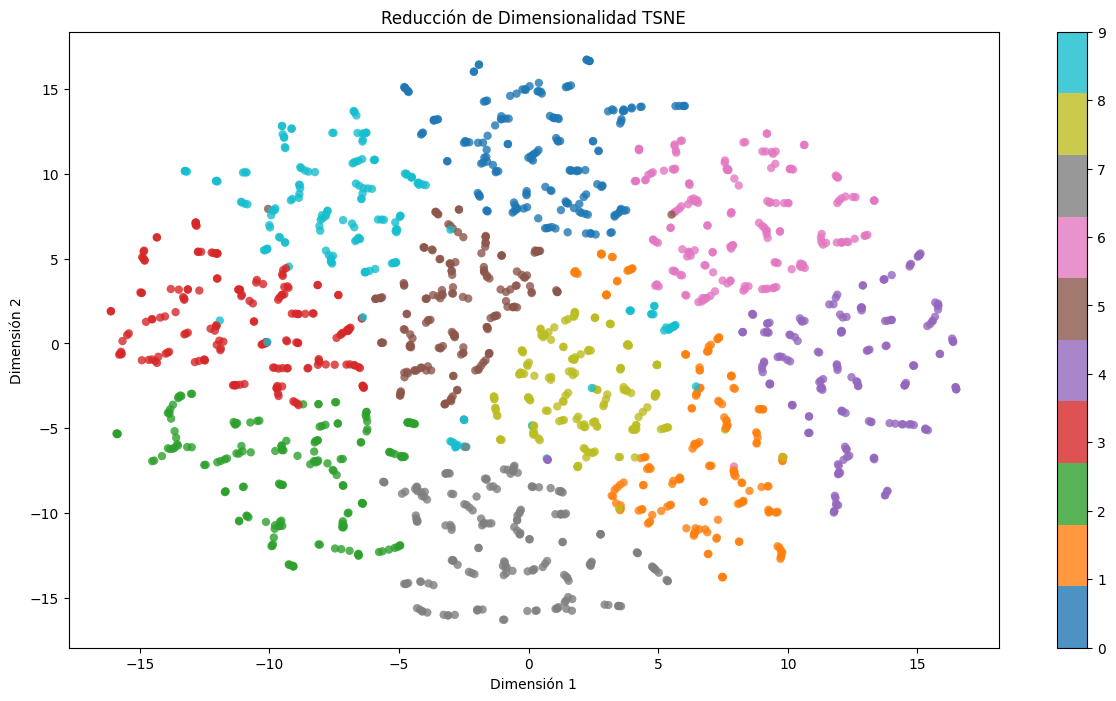

In [ ]:
# Código TSNE
tsne = TSNE(n_components=2, perplexity=2, n_iter=300)
projected = tsne.fit_transform(data_digits)

plt.figure(figsize=(15, 8))
color = matplotlib.colormaps['tab10']
plt.scatter(projected[:, 0], projected[:, 1], c=dataset.target, edgecolor='none', alpha=0.8,
            cmap=matplotlib.colormaps['tab10'])

plt.title('Reducción de Dimensionalidad TSNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.colorbar()
plt.show()

## Actividad 3

Comente qué observa de diferente entre la visualización de TSNE y PCA.

**Respuesta:**
En la TSNE se distingue de mejor manera cada una de las clases, vemos que existe una mejor clasificacion de los datos, en comparacion con el PCA. en base a cada uno de los grupos al que pertenece cada observacion.

## Actividad 4

Reutilice el código de TSNE para visualizar los dígitos, pero **cambie el argumento de perplejidad y de iteración cuando se crea el objeto `TSNE`** (`perplexity` y `n_iter`). ¿Qué diferencias observa? ¿Se separaron mejor las clases? Comente.

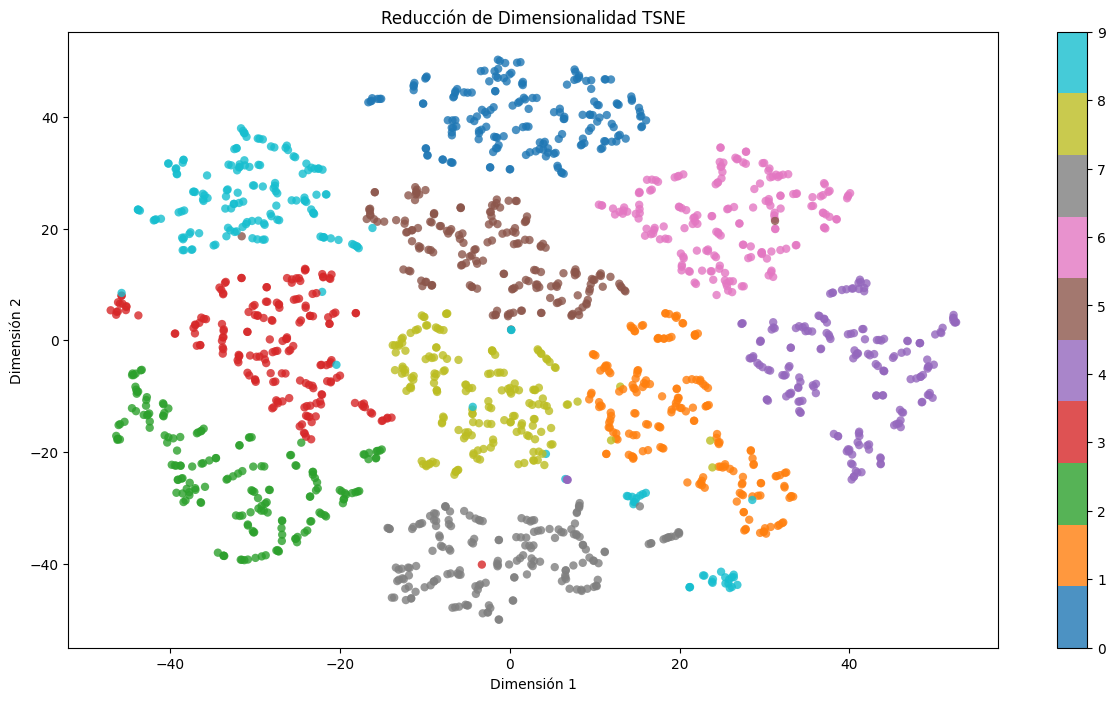

In [ ]:
# Código de TSNE con otro valor
tsne = TSNE(n_components=2, perplexity=5, n_iter=500)
projected = tsne.fit_transform(data_digits)

plt.figure(figsize=(15, 8))
color = matplotlib.colormaps['tab10']
plt.scatter(projected[:, 0], projected[:, 1], c=dataset.target, edgecolor='none', alpha=0.8,
            cmap=matplotlib.colormaps['tab10'])

plt.title('Reducción de Dimensionalidad TSNE')
plt.xlabel('Dimensión 1')
plt.ylabel('Dimensión 2')
plt.colorbar()
plt.show()

Respuesta: Al trabajar con un nivel de perplejidad de 5 y un numero de iteraciones de 500, vemos que las observaciones se agrupan alrededor de cada clase de una mejor manera (cada clase esta a mayor distancia de la otra), por lo que en caso de existir uno nuevo data point, sera relativamente mas sencillo observar a que clase pertenece.

### Visualización de imágenes con gráfico de dispersión

En los ejemplos anteriores, cada imagen fue asociada a un punto con color en donde el canal de color codificaba el dígito correspondiente, pero a veces nos interesa ver las imágenes. Por lo tanto, ahora creamos una función que después nos ayudará a visualizar las imágenes tras aplicar una reducción de dimensionalidad. No es necesario aprender cómo está programada la función, solo entender que su funcionalidad es posicionar imágenes en un gráfico dadas 2 posiciones (x, y).

In [ ]:
from matplotlib import offsetbox

def plot_components(data, model, images=None, ax=None, thumb_frac=0.01):

    ax = ax or plt.gca()
    proj = model.fit_transform(data)
    ax.plot(proj[:, 0], proj[:, 1], '.k')

    if images is not None:
        min_dist_2 = (thumb_frac * max(proj.max(0) - proj.min(0))) ** 2
        shown_images = np.array([2 * proj.max(0)])
        for i in range(data.shape[0]):
            dist = np.sum((proj[i] - shown_images) ** 2, 1)
            if np.min(dist) < min_dist_2:
                # don't show points that are too close
                continue
            shown_images = np.vstack([shown_images, proj[i]])
            imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i],
                                                                      zoom=3,
                                                                      cmap="gray"),proj[i])
            ax.add_artist(imagebox)

Y ahora solo vamos a trabajar con 100 imágenes.

In [ ]:
N = 100 # Cantidad de imagenes a trabajar
data_digits = np.array([x.flatten() for x in dataset.images[:N]])

### PCA

Vamos a probar reducir esas 64 columnas por imagen en 2 columnas, luego, utilizar esas 2 columnas como coordenadas (x,y) para posicionar la imagen y ver cómo se organizan estas.

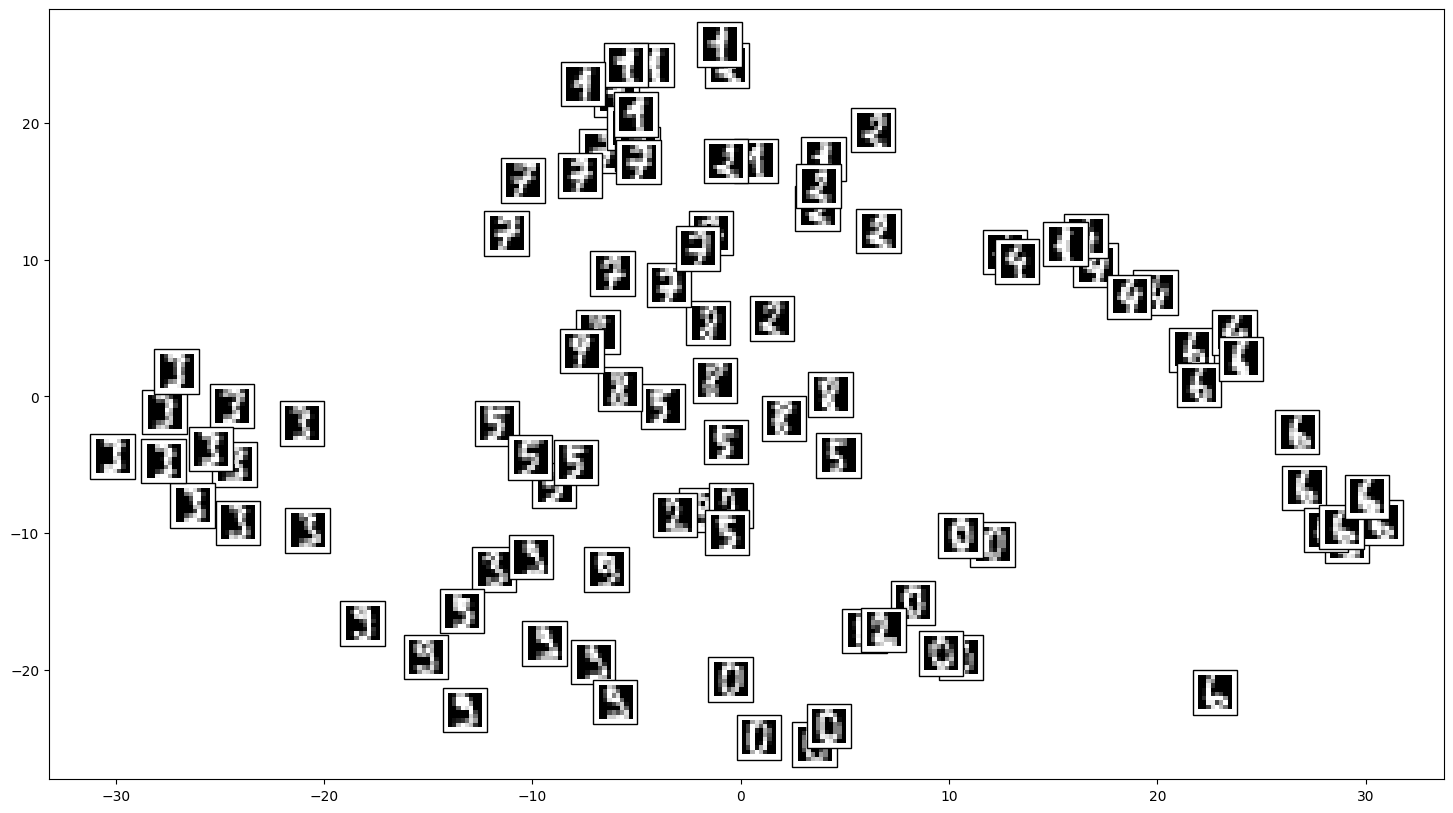

In [ ]:
fig, ax = plt.subplots(figsize=(18, 10))
plot_components(data_digits, model=PCA(n_components=2), images=dataset.images[:N])

#### Observación
Podemos ver que algunos números se agrupan entre sí, esto es, porque la información de sus 64 columnas es similar y cuando se aplica la reducción de dimensión, las 2 columnas que quedan contienen casi la misma información y por ello, van a tender a estar juntas las imágenes similares. Ahora utilicemos otra técnica de reducción.



### TSNE


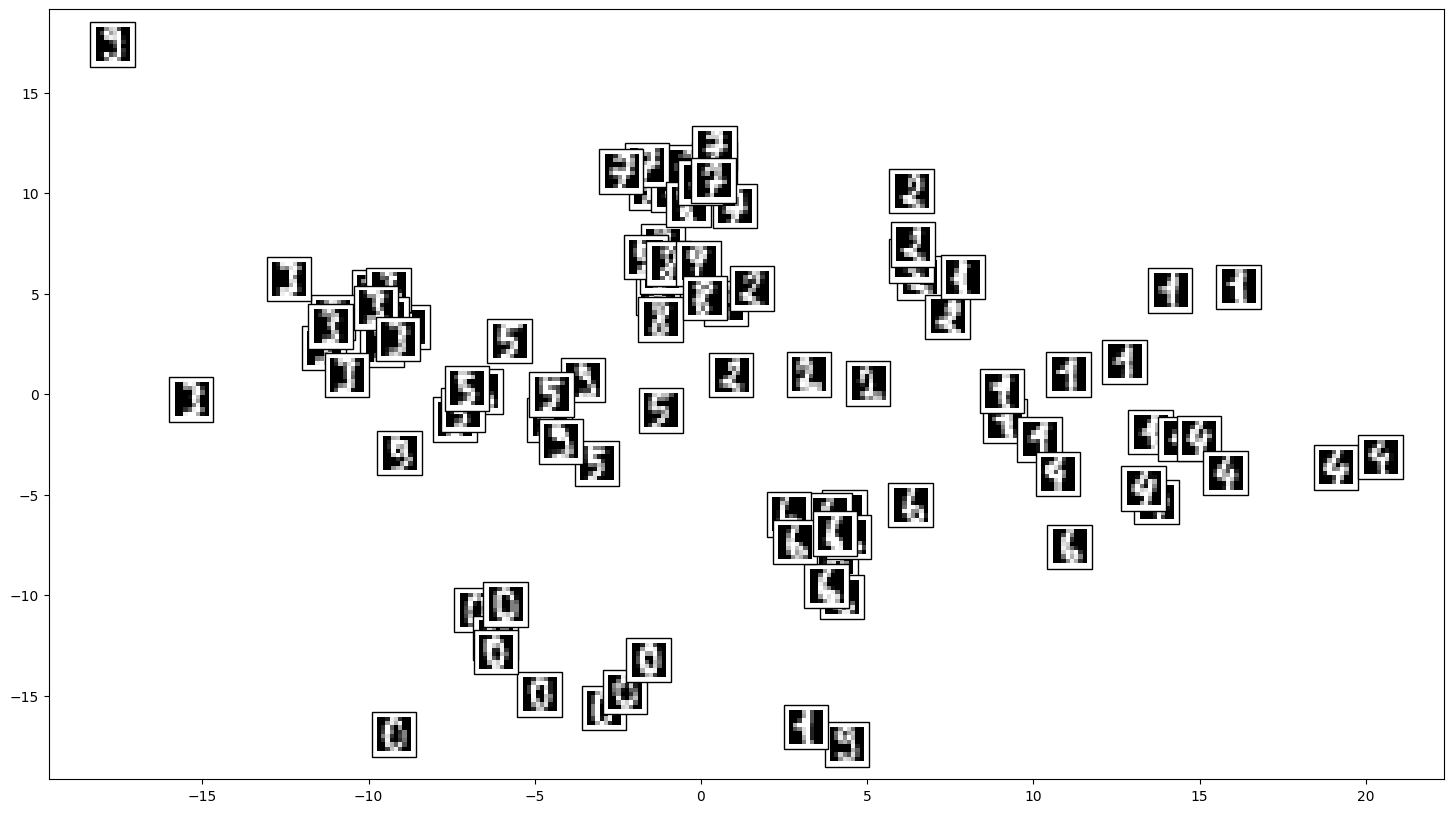

In [ ]:
perplexity = 4 # Probar con valores que deseen numérico
n_iter = 250 # Probar con valores que deseen numérico

fig, ax = plt.subplots(figsize=(18, 10))
plot_components(data_digits, model=TSNE(n_components=2, perplexity=perplexity, n_iter=n_iter),
                images=dataset.images[:N])

#### Observación

En este caso, como TSNE contiene una variante aleatoria y posibles parámetros para configurar la reducción, la imagen final puede ser muy distinta. Te invito a intentar cambiar los parámetros para ver si llega a salir una visualización que tenga mejor separación de los números.

### UMAP

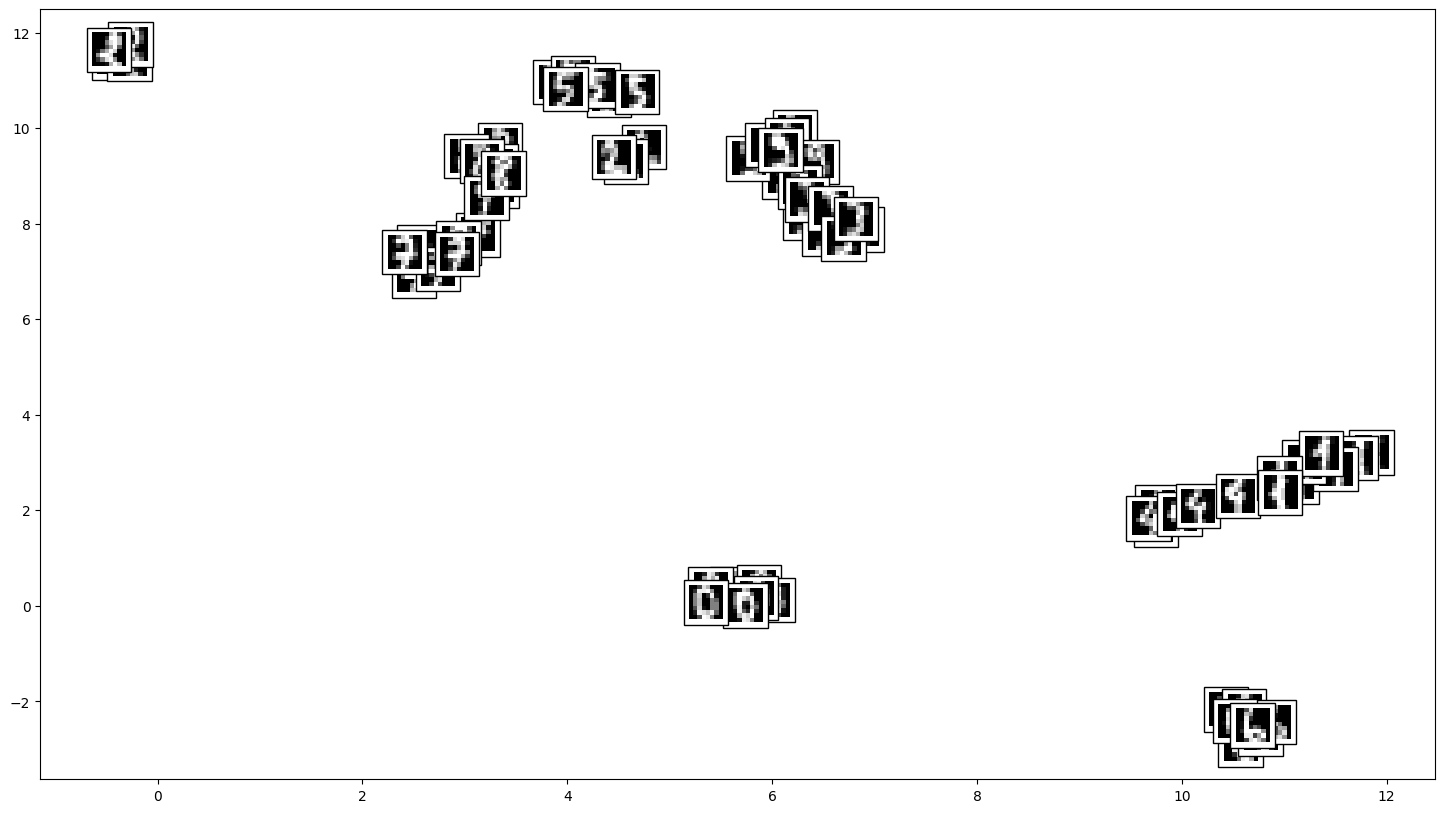

In [ ]:
n_neighbors = 10 #Valor de 2 a 100

fig, ax = plt.subplots(figsize=(18, 10))
plot_components(data_digits, model=umap.UMAP(n_neighbors=n_neighbors), images=dataset.images[:N])

#### Observación

Podemos apreciar que bajo UMAP, los números quedaron mucho más agrupados entre sí y separados de otros, lo cual permite mostrar que esta reducción de dimensión logra bajar de 64 columnas a 2 y mantiene bastante información de los datos para poder seguir distinguiendo una clase de otra.

## Actividad 5

A continuación se cargará otro _dataset_ con imágenes. En este caso serán obras de arte. Cada imagen tiene asociada un vector de 2048 características, es decir, 2048 columnas.

1. Aplique 2 técnicas de reducción de dimensionalidad diferentes a dicho _dataset_ y visualice las imágenes en una grilla como en el ejemplo anterior. A continuación se entregará una serie de funciones para facilitar todo este proceso, lea la documentación entregada. **Importante:** usar la misma técnica de reducción con 2 parámetros distintos no será aceptado, debe utilizar 2 técnicas distintas (por ejemplo, PCA vs TSNE).

2. Agregue una observación (como se hizo con los dígitos) en donde compare ambas visualizaciones. ¿Las pinturas similares quedan juntas? ¿Hay alguna pintura que no concuerda en algún _cluster_? ¿Qué aspectos tienen en común las imágenes que están juntas en la visualización? Comente.



### Descargar dataset



In [ ]:
from IPython.display import clear_output

download_file_without_authenticate("1LRxdcv6bwPLYFcHe1uYYUlJVsPk9760B", "surdoc.zip")

!unzip -o surdoc

clear_output() # Limpiar ventana para que no se vea despues.
!ls

features  images  __MACOSX  penguins.csv  sample_data  surdoc.zip


### Cargar información

Esto cargará 100 imágenes de las aproximadamente 400 que hay. Cada vez que ejecutes la siguiente casilla, se seleccionarán 100 de forma aleatoria

In [ ]:
import os
import random
import cv2


images = []
dataset = []
images_path = random.sample(os.listdir("images"), 100)
for image in images_path:
  if image.endswith(".jpg"):
    image_file = cv2.imread(os.path.join("images", image))
    resized = cv2.resize(image_file, (20, 30), interpolation = cv2.INTER_AREA)
    images.append(resized)

    npy = image[:-3] + "npy"
    dataset.append(np.load(os.path.join("features", npy)))

images_surdoc = np.array(images)
dataset_surdoc = np.array(dataset)

Vemos algunas imágenes.

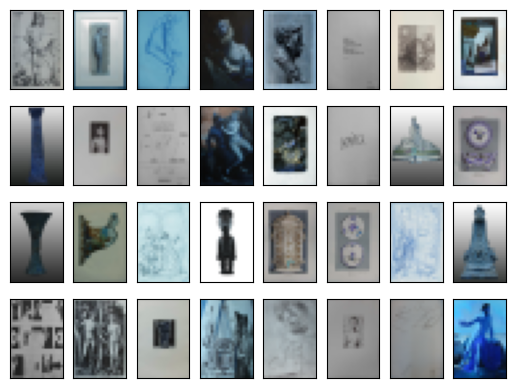

In [ ]:
fig, ax = plt.subplots(4, 8, subplot_kw=dict(xticks=[], yticks=[]))
for i, axi in enumerate(ax.flat):
    axi.imshow(images_surdoc[i])

### Funciones

A continuación se presenta una nueva funciones a utilizar para visualizar imágenes. No es necesario entender su funcionamiento línea a línea, solo que dado un dataset de 2 columnas, la función posiciona las fotos en el gráfico.

In [ ]:
def visualizar(dataset_reducido, metodo, images=None, ax=None, thumb_frac=0.01):
  """
  Método utilizado para visualizar las obras de arte
  """

  ax = ax or plt.gca()
  proj = metodo.fit_transform(dataset_reducido)
  ax.plot(proj[:, 0], proj[:, 1], '.k')

  if images is not None:
      min_dist_2 = (0.001 * max(proj.max(0) - proj.min(0))) ** 2
      shown_images = np.array([2 * proj.max(0)])
      for i in range(proj.shape[0]):
          dist = np.sum((proj[i] - shown_images) ** 2, 1)
          if np.min(dist) < min_dist_2:
              # don't show points that are too close
              continue
          shown_images = np.vstack([shown_images, proj[i]])
          imagebox = offsetbox.AnnotationBbox(offsetbox.OffsetImage(images[i],
                                                                    zoom=2,
                                                                    cmap="gray"),proj[i])
          ax.add_artist(imagebox)

### Documentación de funciones (Los mismas definidas anteriormente + una para visualizar)

* `reducir_con_pca(data)`: recibe el *dataset* y retorna un DataFrame con 2 columnas obtenidas tras aplicar PCA.

* `reducir_con_tsne(data, perplexity, n_iter)`: recibe el *dataset* y dos números positivo. Retorna un DataFrame con 2 columnas obtenidas tras aplicar TSNE. Cambiar el parámetro `perplexity` y/o `n_iter` permite obtener diferentes resultados.

* `reducir_con_mds(data, max_iter)`: recibe el *dataset* y un número positivo. Retorna un DataFrame con 2 columnas obtenidas tras aplicar MDS. Cambiar el parámetro `max_iter` permite obtener diferentes resultados.

* `reducir_con_umap(data, n_neighbors)`: recibe el *dataset* y un número positivo. Retorna un DataFrame con 2 columnas obtenidas tras aplicar UMAP. Cambiar el parámetro `n_neighbors` permite obtener diferentes resultados.

* `visualizar(dataset_reducido, metodo)`. Recibe el *dataset* generado por las funciones detalladas anteriormente y un *string* para poner antes del *dataset*.


Ejemplo de uso de las funciones:

```python
tsne_dataset_version_1 = reducir_con_tsne(dataset_surdoc, 30, 250)
tsne_dataset_version_2 = reducir_con_tsne(dataset_surdoc, 60, 300)
visualizar(tsne_dataset_version_1, "TSNE con perplexity de 30")
```

### Generar gráficos

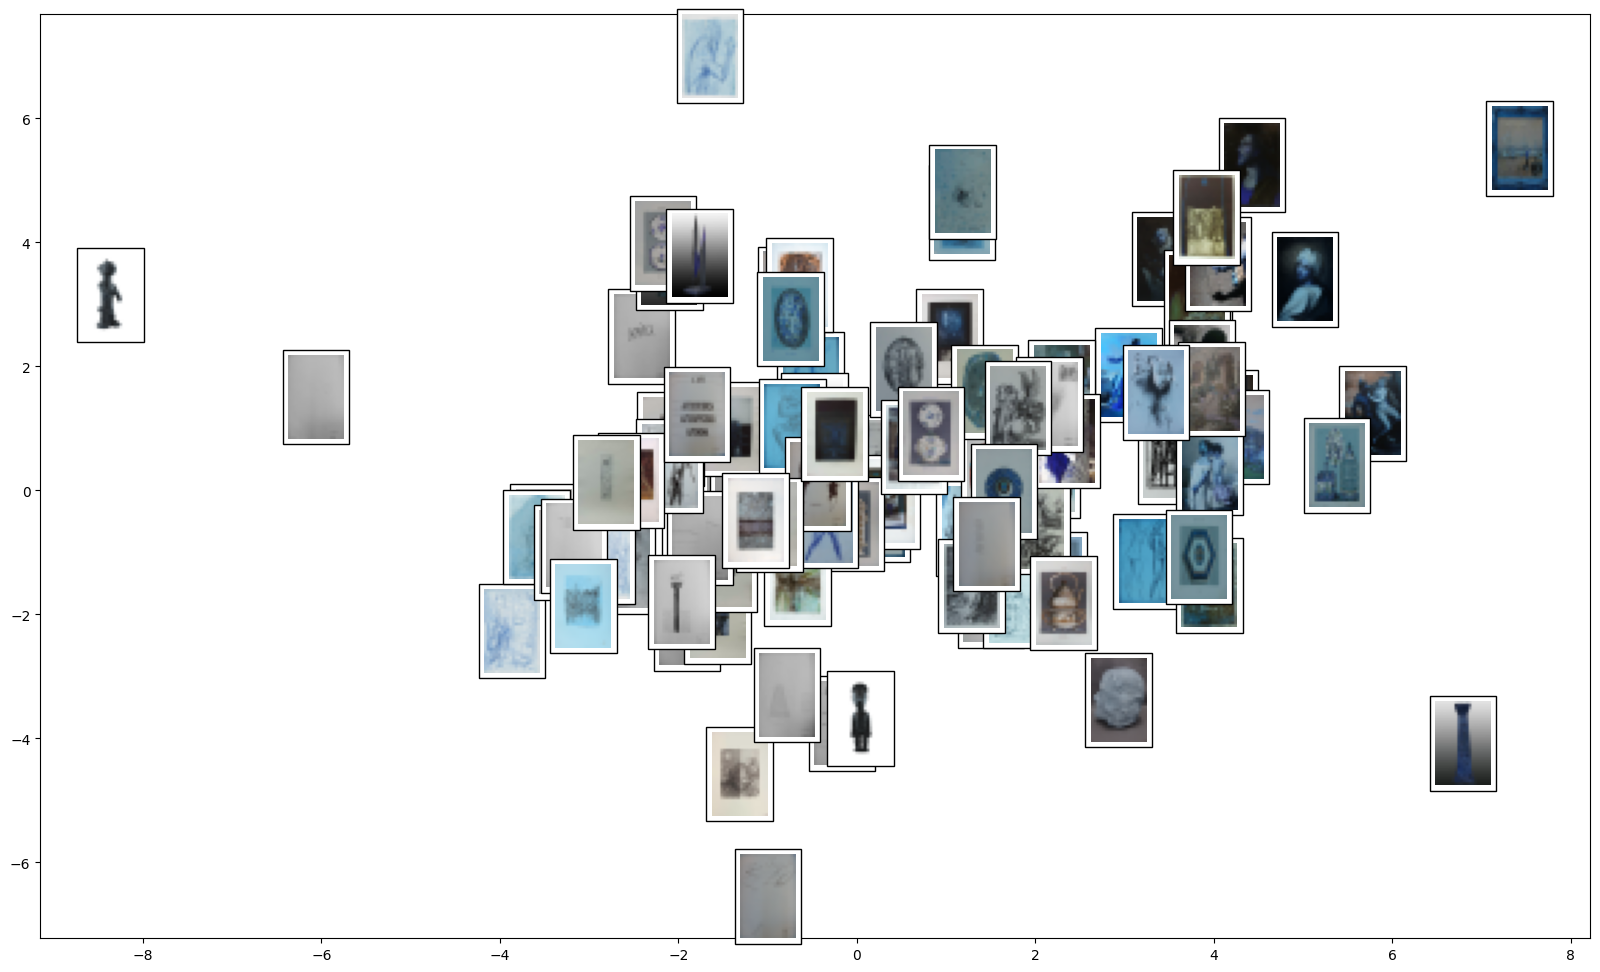

In [ ]:
# Gráfico 1 TSNE
N = 100 # Cantidad de imagenes a trabajar
obras_arte = np.array([x.flatten() for x in images_surdoc[:N]])

fig, ax = plt.subplots(figsize=(20, 12))
visualizar(obras_arte, metodo=TSNE(n_components=2, perplexity=5, n_iter=250), images=images_surdoc[:N])

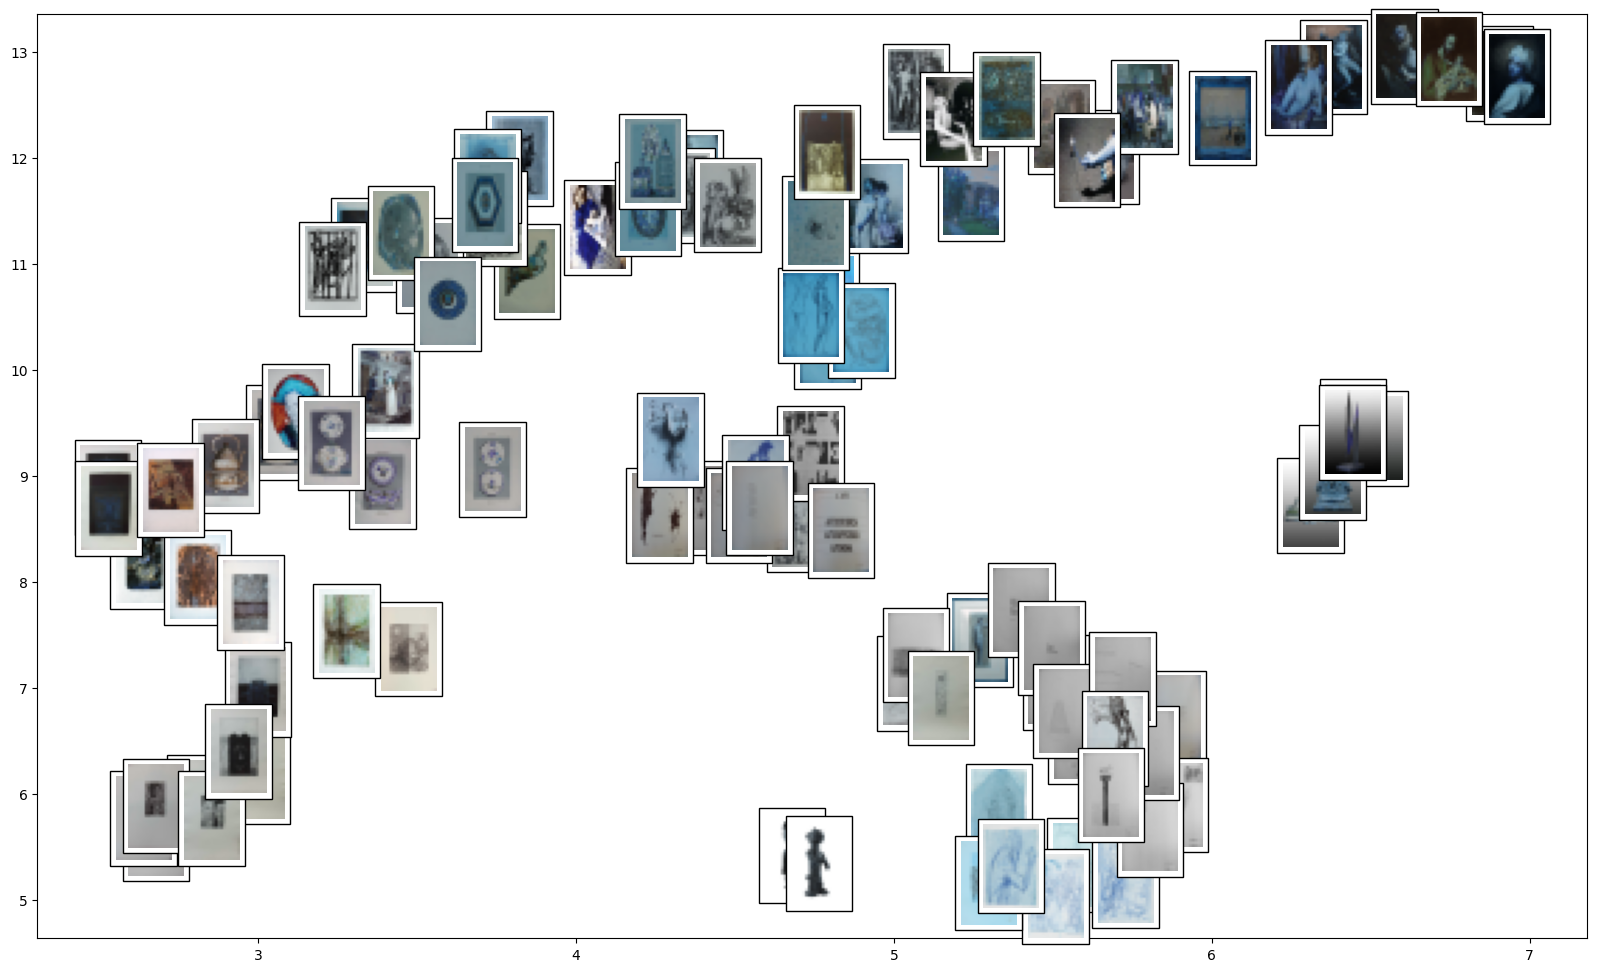

In [ ]:
# Gráfico 2 UMAP
fig, ax = plt.subplots(figsize=(20, 12))
visualizar(obras_arte, metodo=umap.UMAP(n_neighbors=7), images=images_surdoc[:N])

### Comentario

¿Las pinturas similares quedan juntas? ¿Hay alguna pintura que no concuerda en algún *cluster*? ¿Qué aspectos tienen en común las imágenes que están juntas en la visualización? ¿Cuál de las 2 técnicas utilizadas aplicó una mejor reducción de dimensionalidad? Comente.


Las pinturas similares quedan juntas gracias a la aplicacion del UMAP y se las puede distinguir de que categoria son de mucha mejor manera que aplicando TSNE.

El aspecto que tienen en comun en cada cluster de images es el color y la figura interior.

Por lo tanto entre las dos técnicas de reduccion de dimensionalidad aplicadas (TSNE & UMAP) diremos que UMAP dio mejores resultados ya que se obtiene una buena informacion de los datos, despues de aplicar la reduccion de dimensionalidad, como para poder distinguir entre una clase y otra.

---
---

### ¿Con ganas de ver más?
* Mapa interactivo con diferentes obras de arte posicionadas según reducción de dimensionalidad: https://niebla.ing.puc.cl/surdoc/

* Cómo afectan los diferentes parámetros de **TSNE** en la reducción de dimensionalidad: https://distill.pub/2016/misread-tsne/.

* Cómo afectan los diferentes parámetros de **UMAP** en la reducción de dimensionalidad: https://pair-code.github.io/understanding-umap/.